In [14]:
# -*- coding: utf-8 -*-
import json
import math
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif']=['MS Gothic']
matplotlib.rcParams['axes.unicode_minus']=False

with open('paimon-moe-local-data.json','r') as f:
    json_file = json.load(f)

In [27]:
characters_5star_list = [
    "mona",
    "kamisato_ayaka",
    "qiqi",
    "raiden_shogun",
    "jean",
    "albedo",
    "shenhe",
    "zhongli",
    "yae_miko"]
characters_5star_wish_count = 0 #星５の合計
wish_count = 580 + 171 #祈願合計数
one_time_count_list = [] #星５が当たるまでの祈願回数収納リスト
one_time_count = 0 #星５が当たるまでの祈願回数
data = json_file.get("wish-counter-character-event")["pulls"]
for i in data:
    one_time_count += 1
    if i["id"] in characters_5star_list:
        characters_5star_wish_count += 1
        one_time_count_list.append(one_time_count)
        one_time_count = 0
data2 = json_file.get("wish-counter-standard")["pulls"]
one_time_count = 0
for i2 in data2:
    one_time_count += 1
    if i2["id"] in characters_5star_list:
        characters_5star_wish_count += 1
        one_time_count_list.append(one_time_count)
        one_time_count = 0
print("確率分布:幾何分布")
print("星５獲得回数: {:.2f}".format(characters_5star_wish_count))
p1 = characters_5star_wish_count/wish_count
print("星５の確率: {:.6f}".format(p1))
print("星５の期待値: {:.6f}".format(1/p1))
print("分散: {:.6f}".format((1-p1)/(p1*p1)))
print("標準偏差： {:.6f}".format(math.sqrt((1-p1)/(p1*p1))))
print("星５が当たるまでの回数リスト:",one_time_count_list)

確率分布:幾何分布
星５獲得回数: 12.00
星５の確率: 0.015979
星５の期待値: 62.583333
分散: 3854.090278
標準偏差： 62.081320
星５が当たるまでの回数リスト: [24, 80, 19, 64, 2, 81, 81, 82, 77, 67, 60, 49]


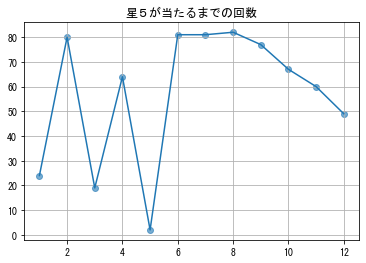

In [16]:
x = one_time_count_list
y = range(1,len(one_time_count_list)+1)
plt.scatter(y,x,alpha=0.6)
plt.plot(y,x)
plt.grid(axis='both')
plt.title("星５が当たるまでの回数")
plt.show()

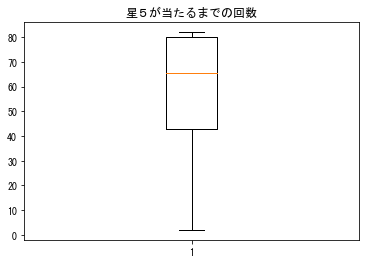

In [17]:
plt.boxplot(x)
plt.title("星５が当たるまでの回数")
plt.show()

In [28]:
mean,variance,skewness,kurtosis=stats.geom.stats(p1,moments="mvsk")
print("E[X]:",mean)
print("V[X]:",variance)
print("標準偏差:",math.sqrt(variance))
print("歪度:",skewness)
print("尖度:",kurtosis)

E[X]: 62.583333333333336
V[X]: 3854.090277777778
標準偏差: 62.08131987786486
歪度: 2.00006486509863
尖度: 6.000259464602001


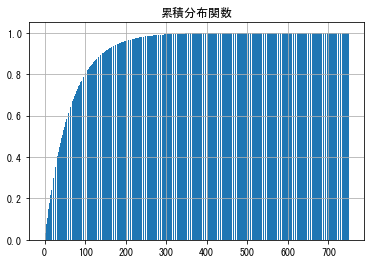

In [30]:
n=wish_count
p=p1
x=range(0,wish_count)
pmf_result=stats.geom.cdf(x,p)

plt.bar(x,pmf_result)
plt.title("累積分布関数")
plt.grid(axis='both')
plt.show()

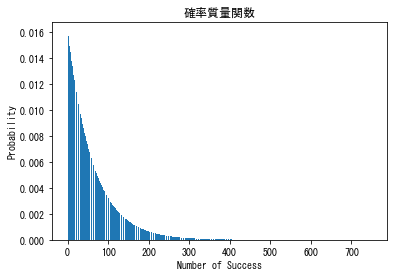

In [20]:
n=wish_count
p=p1
x=range(0,n)
pmf_result=stats.geom.pmf(x,p)

plt.bar(x,pmf_result)
plt.xlabel('Number of Success')
plt.ylabel('Probability')
plt.title("確率質量関数")
plt.show()

In [21]:
z = 1.96 #標準正規分布の95%信頼区間のz値
p1_standard_error = z * (math.sqrt((p1*(1-p1))/wish_count))
print("標準誤差：{:.6f}".format(p1_standard_error))
print("母集団確率範囲：[{:.6f},{:.6f}]".format(p1 + p1_standard_error,p1 - p1_standard_error))

標準誤差：0.008968
母集団確率範囲：[0.024947,0.007010]


In [22]:

p0 = 0.016 #原神公式で公開された星５の総合確率
n = wish_count
significance_level = 0.025 #有意水準設定
z = abs((p1-p0)/(math.sqrt((p0*(1-p0))/n)))
print("H0:星5が当たる確率は1.6%(P=0.016)")
print("H1:星5が当たる確率は1.6%ではない(P≠0.016)")
print("正規化したz値:",z)
z0 = abs(stats.norm.ppf(significance_level)) #標準正規分布の95%信頼区間のz値
print("有意水準5%で、両側検定のz値:",z0)
if z <= z0 :
    print("H0は棄却できない・H0を棄却するための十分な証拠がない")
else:
    print("H0が棄却され、H1を受容する")


H0:星5が当たる確率は1.6%(P=0.016)
H1:星5が当たる確率は1.6%ではない(P≠0.016)
正規化したz値: 0.004653100937838977
有意水準5%で、両側検定のz値: 1.9599639845400545
H0は棄却できない・H0を棄却するための十分な証拠がない


In [23]:
b = stats.binomtest(characters_5star_wish_count,n,p0) #確率関数のインスタンス
print("P値:",b.pvalue)
print("子集団の確率:",b.proportion_estimate)
#区間推定算出、パラメータのalternativeでtwo-sided(両側), greater(上側), less(下側)
#デフォルトはtwo-sided(両側)
interval = b.proportion_ci(0.95)
print("low:",interval.low)
print("high:",interval.high)
if b.pvalue < 0.05:
    print("弁護士を呼ぶ時が来た！")
else:
    print("一先ず安心、課金はほどほど")

P値: 1.0
子集団の確率: 0.015978695073235686
low: 0.008282974761761737
high: 0.02774507655042755
一先ず安心、課金はほどほど
